In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import fastf1 as ff1
import fastf1.plotting


In [5]:
# load the data
driver_performance = pd.read_pickle('data/driver_performance.pkl')

# use a default session to set color maps etc
year = 2024
circuit = 'Japan'
session = 'Q'
race = ff1.get_session(year, circuit, session)

drivers_of_interest = ['VER','PER','LEC','SAI','HAM','RUS', 'NOR', 'PIA', 'ALO','STR','OCO', 'GAS']
driver_subset = ['VER','HAM','LEC', 'NOR', 'GAS','ALO']
driver_performance.columns

Index(['event', 'driver', 'team', 'best_quali_lap_time', 's1_quali_time',
       's2_quali_time', 's3_quali_time', 'speed_trap_quali', 'slow_min_quali',
       'slow_avg_quali', 'medium_min_quali', 'medium_avg_quali',
       'fast_min_quali', 'fast_avg_quali', 'total_brake_time_quali',
       'race_position', 'race_status', 'best_race_lap_time', 'avg_race_pace',
       'lap_time_consistency', 'model_time', 'points', 'slow', 'medium',
       'fast', 'corner_min', 'corner_avg'],
      dtype='object')

In [4]:
def f1_violin_plot(plot_data, variable, title,y_label):# create the figure
    fig, ax = plt.subplots(figsize=(10, 5))

    sns.violinplot(data=plot_data,
                   x="driver",
                   y=variable,
                   order=drivers_of_interest,
                   hue="driver",
                   inner=None,
                   density_norm="area",
                   palette=fastf1.plotting.get_driver_color_mapping(session=race)
                   )

    sns.swarmplot(data=plot_data,
                  x="driver",
                  y=variable,
                  order=drivers_of_interest,
                  color="white",
                  linewidth=0,
                  size=4,
                  )

    ax.set_xlabel("Driver")
    ax.set_ylabel(y_label)
    plt.suptitle(title)
    sns.despine(left=True, bottom=True)

    plt.tight_layout()
    plt.show()

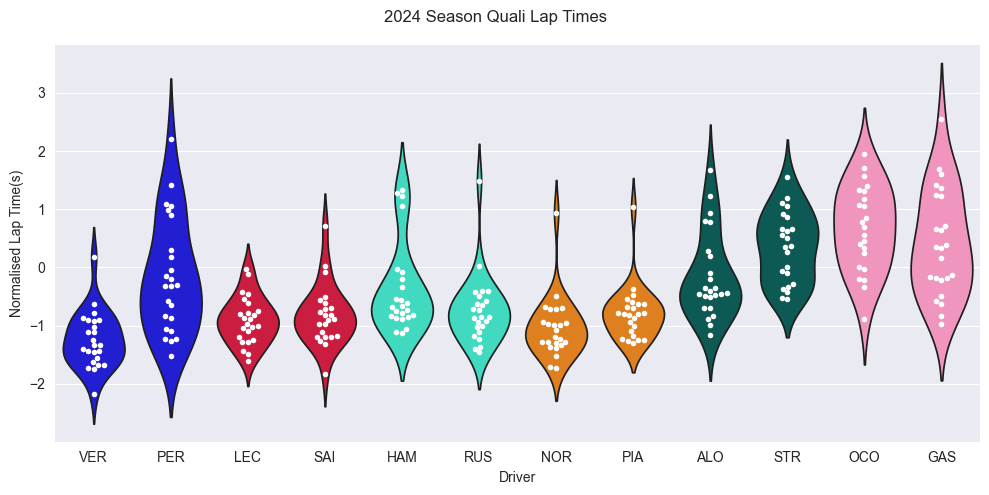

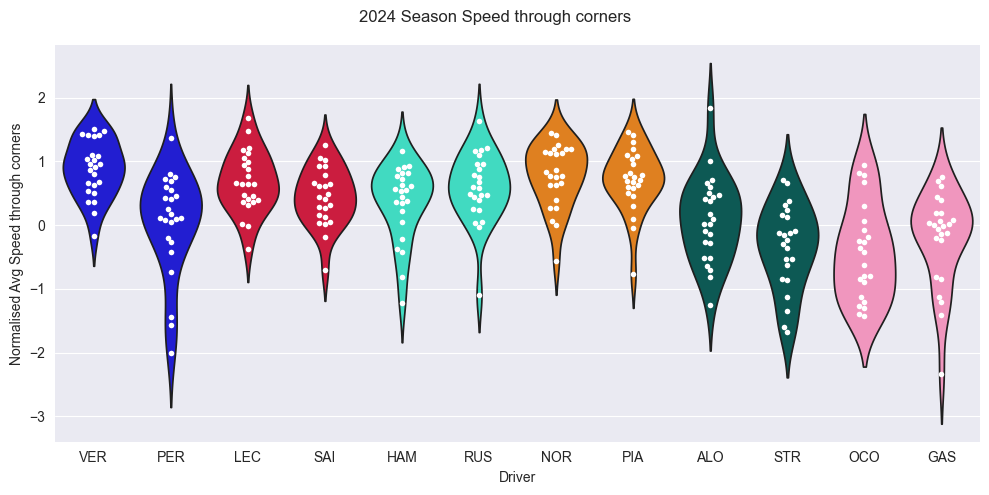

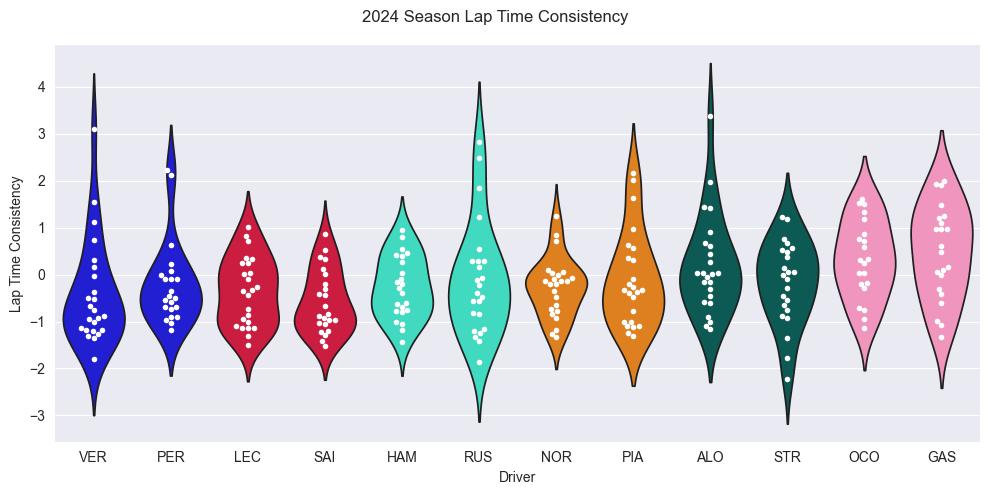

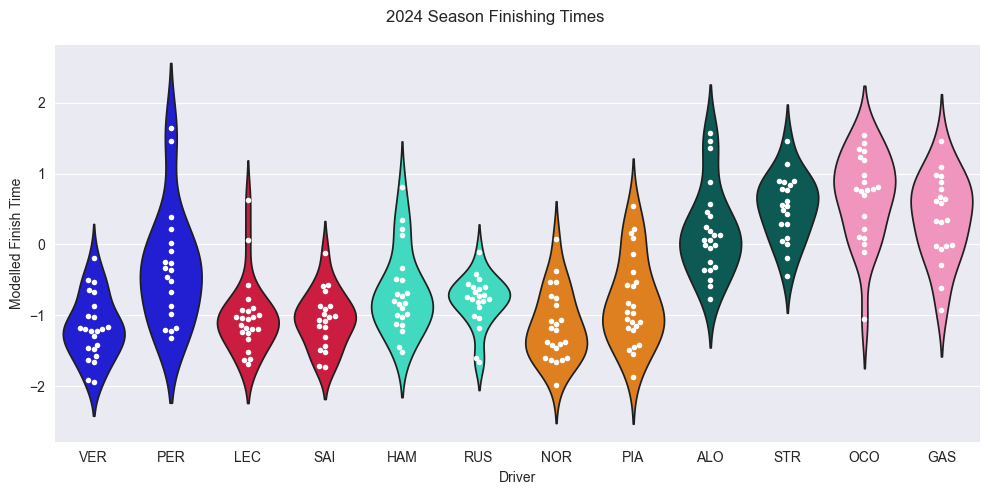

In [12]:
#  plot just for drivers of interest
plot_data = driver_performance[driver_performance['driver'].isin(drivers_of_interest)]

f1_violin_plot(plot_data, 'best_quali_lap_time',title="2024 Season Quali Lap Times",y_label='Normalised Lap Time(s)')
# f1_violin_plot(plot_data, 'total_brake_time_quali',title="2024 Season Braking Times",y_label='Normalised time on brakes')
f1_violin_plot(plot_data, 'corner_avg',title="2024 Season Speed through corners",y_label='Normalised Avg Speed through corners')

f1_violin_plot(plot_data, 'lap_time_consistency',title="2024 Season Lap Time Consistency",y_label='Lap Time Consistency')
f1_violin_plot(plot_data, 'model_time',title="2024 Season Finishing Times",y_label='Modelled Finish Time')
# f1_violin_plot(plot_data, 'best_race_lap_time',title="2024 Season Best Race Lap",y_label='Normalised Lap Time(s)')


In [5]:
def f1_scatter_plot(plot_data, y,x, title,y_label,x_label):
    fig, ax = plt.subplots(figsize=(10, 5))

    sns.scatterplot(data=plot_data,
                    x=x,
                    y=y,
                    ax=ax,
                    hue="driver",
                    palette=fastf1.plotting.get_driver_color_mapping(session=race),
                    s=80,
                    linewidth=0,
                    legend='auto')

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # The y-axis increases from bottom to top by default
    # Since we are plotting time, it makes sense to invert the axis
    #ax.invert_yaxis()
    plt.suptitle(title)

    # Turn on major grid lines
    plt.grid(color='b', which='major', axis='both')
    sns.despine(left=True, bottom=True)

    plt.tight_layout()
    plt.show()

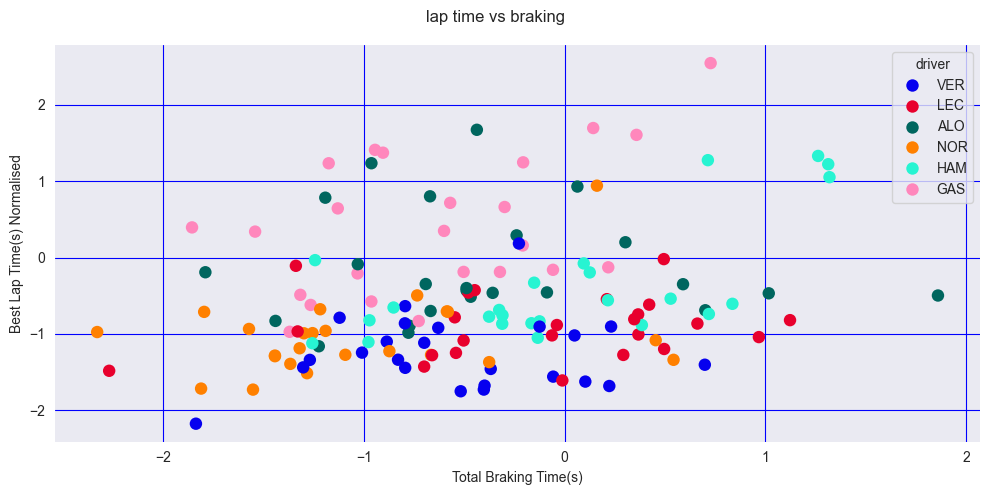

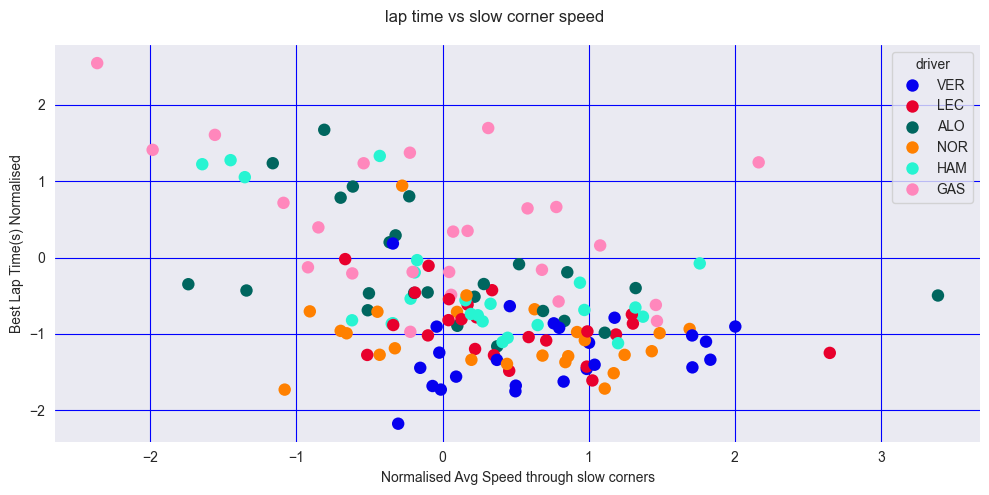

In [6]:
scatter_data = quali_performance[quali_performance['driver'].isin(driver_subset)]

f1_scatter_plot(scatter_data,
                y='best_lap_time_norm',
                x='total_brake_time_norm',
                title = 'lap time vs braking',
                y_label='Best Lap Time(s) Normalised',
                x_label='Total Braking Time(s)'
                )

f1_scatter_plot(scatter_data,
                y='best_lap_time_norm',
                x='slow_avg_norm',
                title = 'lap time vs slow corner speed',
                y_label='Best Lap Time(s) Normalised',
                x_label='Normalised Avg Speed through slow corners'
                )

In [7]:
def f1_pairplot(pair_data):
    sns.pairplot(data = pair_data,
                 hue = 'driver',
                 palette=fastf1.plotting.get_driver_color_mapping(session=race)
                 )

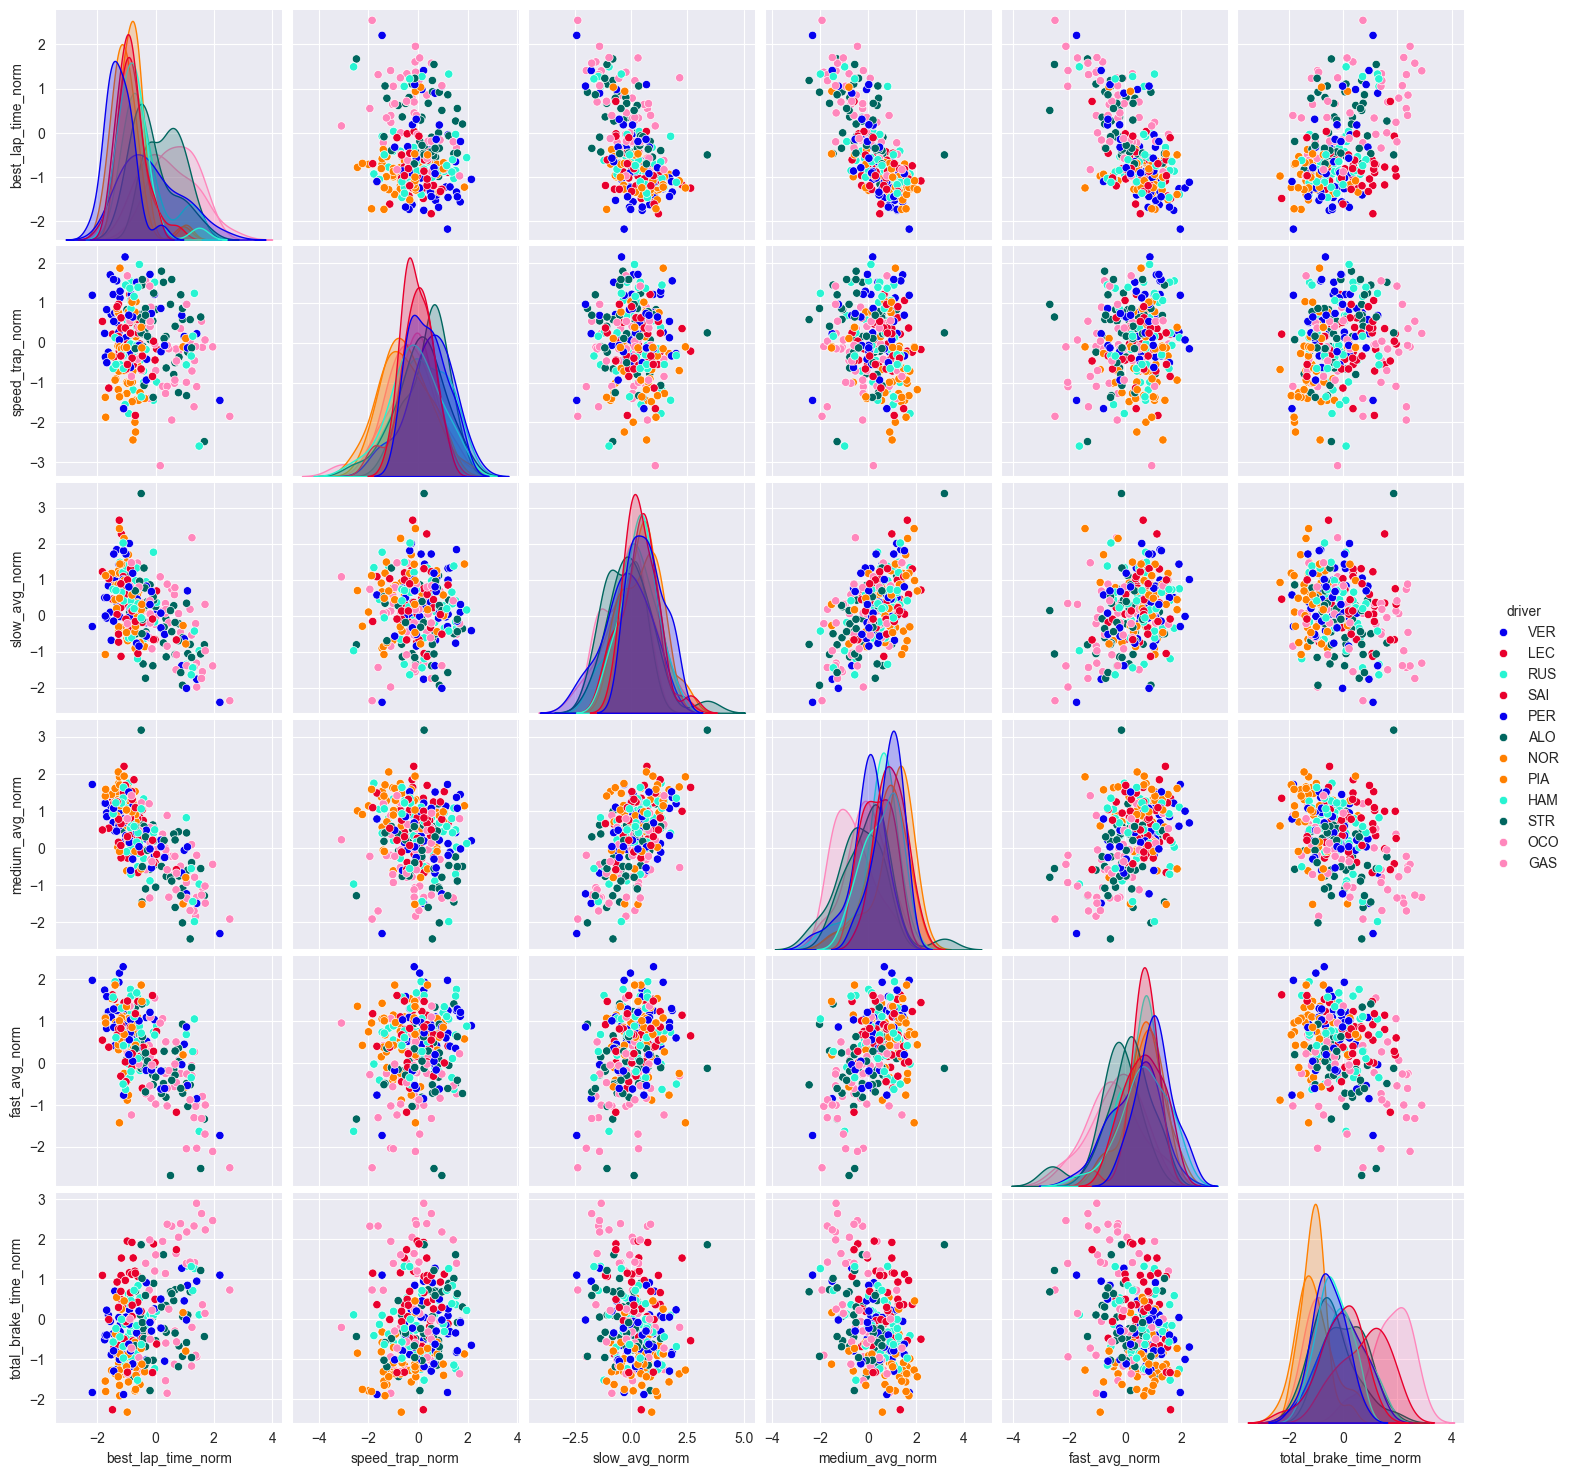

In [8]:
    pair_data = plot_data[['event', 'driver', 'team',
       'best_lap_time_norm', 'speed_trap_norm', 'slow_avg_norm',
       'medium_avg_norm', 'fast_avg_norm', 'total_brake_time_norm']]
    f1_pairplot(pair_data)

In [9]:
corr_matrix = pair_data.select_dtypes(include=[np.number]).corr()
corr_matrix.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,best_lap_time_norm,speed_trap_norm,slow_avg_norm,medium_avg_norm,fast_avg_norm,total_brake_time_norm
best_lap_time_norm,1.00,-0.12,-0.55,-0.74,-0.64,0.42
speed_trap_norm,-0.12,1.00,-0.03,-0.13,0.12,0.18
slow_avg_norm,-0.55,-0.03,1.00,0.54,0.28,-0.24
medium_avg_norm,-0.74,-0.13,0.54,1.00,0.39,-0.38
fast_avg_norm,-0.64,0.12,0.28,0.39,1.00,-0.28
total_brake_time_norm,0.42,0.18,-0.24,-0.38,-0.28,1.00


In [13]:
driver_performance.columns

Index(['event', 'driver', 'team', 'best_quali_lap_time', 's1_quali_time',
       's2_quali_time', 's3_quali_time', 'speed_trap_quali', 'slow_min_quali',
       'slow_avg_quali', 'medium_min_quali', 'medium_avg_quali',
       'fast_min_quali', 'fast_avg_quali', 'total_brake_time_quali',
       'race_position', 'race_status', 'best_race_lap_time', 'avg_race_pace',
       'lap_time_consistency', 'model_time', 'points', 'slow', 'medium',
       'fast', 'corner_min', 'corner_avg'],
      dtype='object')

In [16]:
dp = driver_performance[['event', 'driver', 'best_quali_lap_time', 'slow_avg_quali', 'medium_avg_quali', 'fast_avg_quali', 'avg_race_pace', 'points' ]]
dp

,event,driver,best_quali_lap_time,slow_avg_quali,medium_avg_quali,fast_avg_quali,avg_race_pace,points
0,Abu Dhabi Grand Prix,ALB,1.070997,-1.369570,-0.931471,-0.781093,0.967115,0.0
1,Abu Dhabi Grand Prix,ALO,-0.349122,-1.739918,0.304403,-0.688128,-0.225194,2.0
2,Abu Dhabi Grand Prix,BOT,-0.330945,0.554619,-0.344913,-0.530624,1.111283,0.0
3,Abu Dhabi Grand Prix,COL,1.277767,-0.685335,-2.029110,-0.612682,1.151627,0.0
4,Abu Dhabi Grand Prix,DOO,1.716299,-0.333180,-0.449602,-0.169521,1.352402,0.0
...,...,...,...,...,...,...,...,...
474,United States Grand Prix,SAI,-1.188445,-1.133266,0.659343,0.916214,-1.437405,18.0
475,United States Grand Prix,STR,0.667139,-0.190156,0.220942,-0.289085,1.020456,0.0
476,United States Grand Prix,TSU,0.243053,0.857829,-0.267946,-0.387052,0.510510,0.0
477,United States Grand Prix,VER,-1.676228,0.501077,0.848731,1.589956,-1.201399,15.0
